# Importing Libraries

In [366]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np

# import importlib
# importlib.reload(funcs)

import funcs

from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)

In [285]:
os.chdir('/Users/gavinnguyen/Downloads/')

In [286]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

## Crime over the years

In [287]:
# Convert time: 300 -> 0300, 10 -> 0010
df['TIME OCC'] = df['TIME OCC'].apply(funcs.fix_short_time_of_day)
# Remove false time from Date occ
df['DATE OCC'] = df['DATE OCC'].str.replace(' 12:00:00 AM', '')
# Concatenating date occ and time occ
df['DATETIME OCC'] = df['DATE OCC'] + ' ' + df['TIME OCC']
# Converting to pd.datetime
df['DATETIME OCC'] = pd.to_datetime(df['DATETIME OCC'])
# Dropping old now-redundant columns
df.drop(columns=['DATE OCC', 'TIME OCC'], inplace=True)
# Adding year occurred column
df['YEAR OCC'] = df['DATETIME OCC'].dt.year

Text(0, 0.5, 'Total crimes')

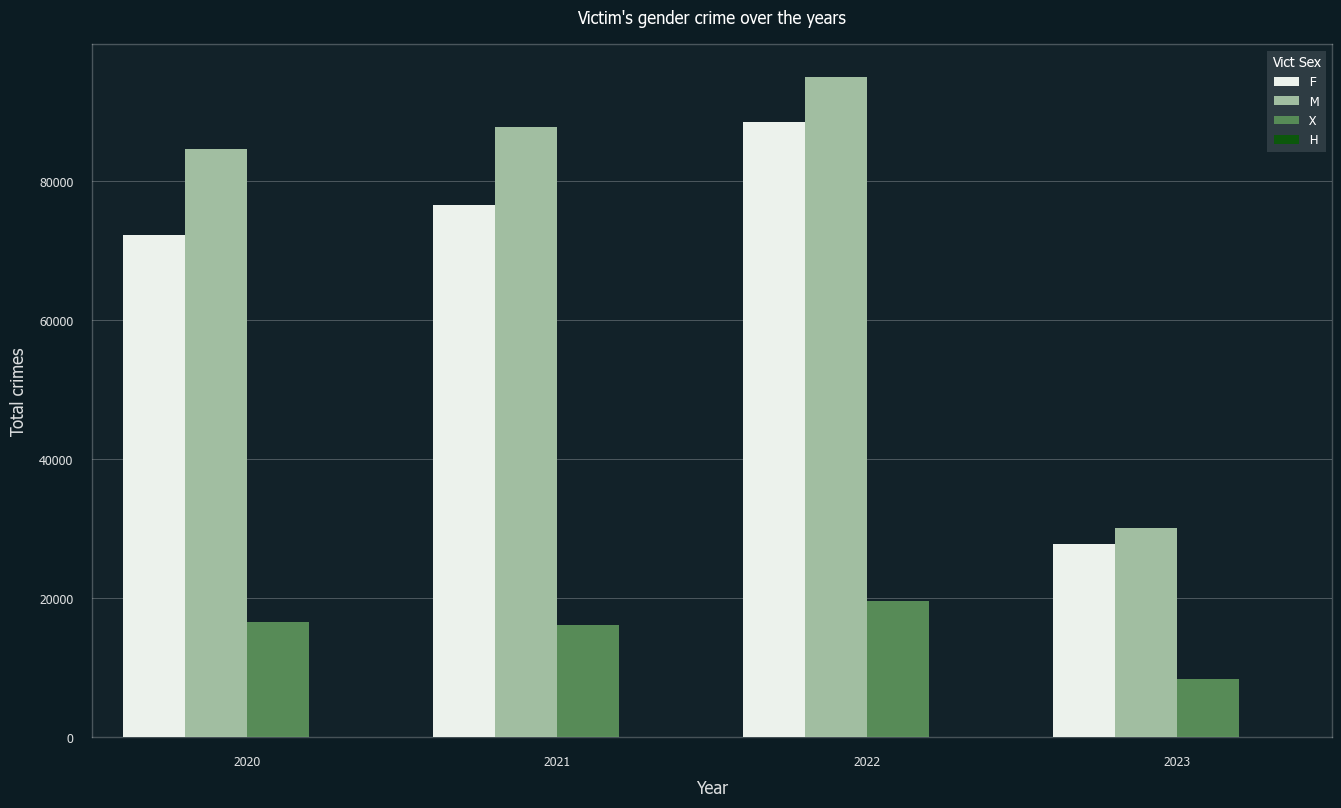

In [290]:
plt.figure(figsize=(16,9))
sns.countplot(data=df, x=df['YEAR OCC'], color='darkgreen', hue=df['Vict Sex'])
sns.set_context({'patch.linewidth': 0.0})
plt.title('Victim\'s gender crime over the years')
plt.xlabel('Year')
plt.ylabel('Total crimes')

## Age-group

In [293]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [294]:
# Filter out victims with age of 0 and store it in a new df
df_age = df.loc[df['Vict Age'] != 0]

In [295]:
df_age_m = df_age.loc[df['Vict Sex'] == 'M']
df_age_f = df_age.loc[df['Vict Sex'] == 'F']
df_age_x = df_age.loc[df['Vict Sex'] == 'X']

In [296]:
df_age = df_age[['Vict Age', 'Vict Sex']]

In [322]:
age_group_victims_m = pd.cut(x=df_age_m['Vict Age'],
                             bins=[0,20,40,60,80,100],
                             labels=['<20 y',
                                     '21 - 40 y',
                                     '41 - 60 y',
                                     '61 - 80 y',
                                     '81 - 100 y']).value_counts().sort_index()

age_group_victims_f = pd.cut(x=df_age_f['Vict Age'],
                             bins=[0,20,40,60,80,100],
                             labels=['<20 y',
                                     '21 - 40 y',
                                     '41 - 60 y',
                                     '61 - 80 y',
                                     '81 - 100 y']).value_counts().sort_index()

age_group_victims_x = pd.cut(x=df_age_x['Vict Age'],
                             bins=[0,20,40,60,80,100],
                             labels=['<20 y',
                                     '21 - 40 y',
                                     '41 - 60 y',
                                     '61 - 80 y',
                                     '81 - 100 y']).value_counts().sort_index()

### Stacked barplot age bin and gender

In [323]:
# todo: stacked bar plot
age_group_victims_m

Vict Age
<20 y          16540
21 - 40 y     134548
41 - 60 y      89405
61 - 80 y      31233
81 - 100 y      2323
Name: count, dtype: int64

In [324]:
age_group_victims_f

Vict Age
<20 y          21205
21 - 40 y     139294
41 - 60 y      74639
61 - 80 y      24369
81 - 100 y      2867
Name: count, dtype: int64

# Boxplot of victim ages

In [305]:
# Removing negative ages
df_age = df_age.loc[df_age['Vict Age'] > 0]

Text(0, 0.5, 'Victim Sex')

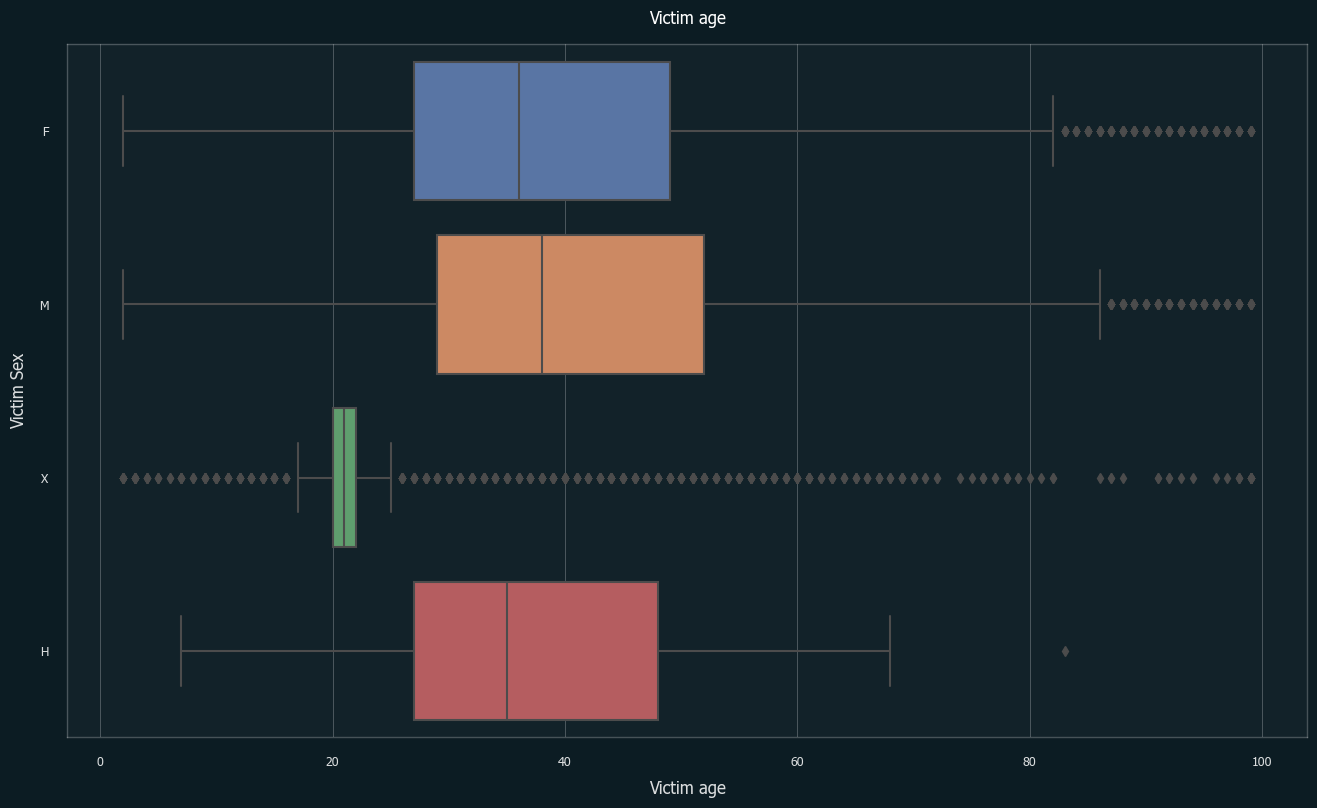

In [338]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_age, orient='horizontal', x=df_age['Vict Age'], y=df_age['Vict Sex'], palette='deep')
plt.title('Victim age')
plt.xlabel('Victim age')
plt.ylabel('Victim Sex')

In [334]:
df_age.loc[df_age['Vict Sex'] == 'H'].describe()

,Vict Age
count,80.00000
mean,37.68750
std,14.88657
min,7.00000
25%,27.00000
50%,35.00000
75%,48.00000
max,83.00000


## Crimes in 2023

In [168]:
# Look only at crimes in the year 2023
df = df.loc[df['YEAR OCC'] == 2023]

In [169]:
df

,DR_NO,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATETIME OCC,YEAR OCC
224925,231400768,04/17/2023 12:00:00 AM,14,Pacific,1453,1,310,BURGLARY,0344 1402,0,...,310.0,998.0,NaN,NaN,4000 GLENCOE AV,NaN,33.9918,-118.4446,2023-04-17 03:00:00,2023
408269,230607141,03/13/2023 12:00:00 AM,6,Hollywood,645,2,354,THEFT OF IDENTITY,1822,72,...,354.0,NaN,NaN,NaN,7000 HOLLYWOOD BL,NaN,34.1015,-118.3417,2023-02-02 14:00:00,2023
408552,230904726,01/20/2023 12:00:00 AM,9,Van Nuys,901,1,510,VEHICLE - STOLEN,NaN,0,...,510.0,NaN,NaN,NaN,7400 ZOMBAR AV,NaN,34.2048,-118.4673,2023-01-17 16:00:00,2023
408580,231604570,01/18/2023 12:00:00 AM,16,Foothill,1693,1,510,VEHICLE - STOLEN,NaN,0,...,510.0,NaN,NaN,NaN,7900 LAUREL CANYON BL,NaN,34.2121,-118.4021,2023-01-18 09:20:00,2023
408747,230900615,02/10/2023 12:00:00 AM,9,Van Nuys,989,2,623,BATTERY POLICE (SIMPLE),1212 1402 0445,0,...,623.0,998.0,NaN,NaN,VENTURA BL,MAMMOTH,34.1482,-118.4326,2023-02-09 23:45:00,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717695,231604807,01/27/2023 12:00:00 AM,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,23,...,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054,2023-01-26 18:00:00,2023
717696,231606525,03/22/2023 12:00:00 AM,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,...,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116,2023-03-22 10:00:00,2023
717697,231210064,04/12/2023 12:00:00 AM,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,...,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915,2023-04-12 16:30:00,2023
717698,232009355,05/01/2023 12:00:00 AM,20,Olympic,2025,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0394 1822,20,...,440.0,NaN,NaN,NaN,300 S ALEXANDRIA AV,NaN,34.0690,-118.2979,2023-05-01 13:30:00,2023


Text(0.5, 1.0, 'Gender of Victims')

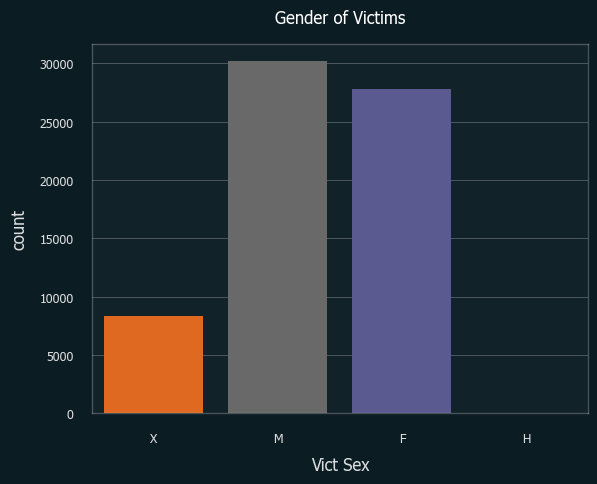

In [273]:
sns.countplot(data=df, x=df['Vict Sex'])
plt.title('Gender of Victims')

In [106]:
df.groupby(['Crm Cd Desc', 'AREA NAME'])['DR_NO'].count()

Crm Cd Desc                               AREA NAME  
ARSON                                     77th Street    14
                                          Central        12
                                          Devonshire      4
                                          Foothill        8
                                          Harbor          1
                                                         ..
VIOLATION OF TEMPORARY RESTRAINING ORDER  Van Nuys        4
                                          West Valley     7
                                          Wilshire        1
WEAPONS POSSESSION/BOMBING                Hollywood       1
                                          Northeast       2
Name: DR_NO, Length: 1673, dtype: int64

# Counts

## Hour of the day, crime count

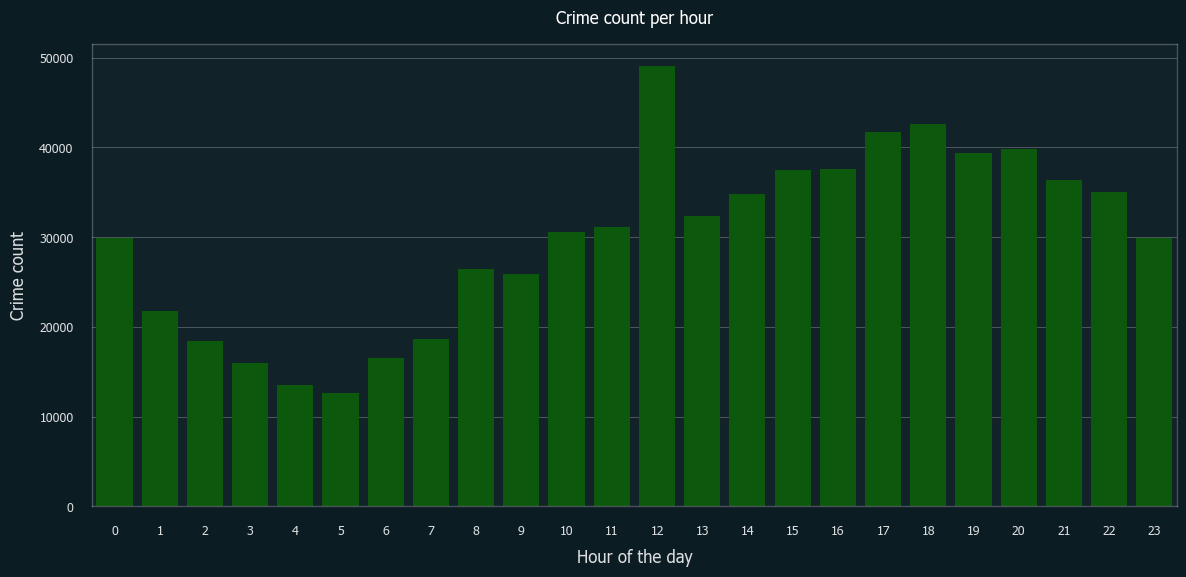

In [340]:
# Crime count per hour
plt.figure(figsize=(14,6))
sns.countplot(data=df, x=df['DATETIME OCC'].dt.hour, color='darkgreen').set_title('Crime count per hour')
plt.ylabel('Crime count')
plt.xlabel('Hour of the day')
plt.show()

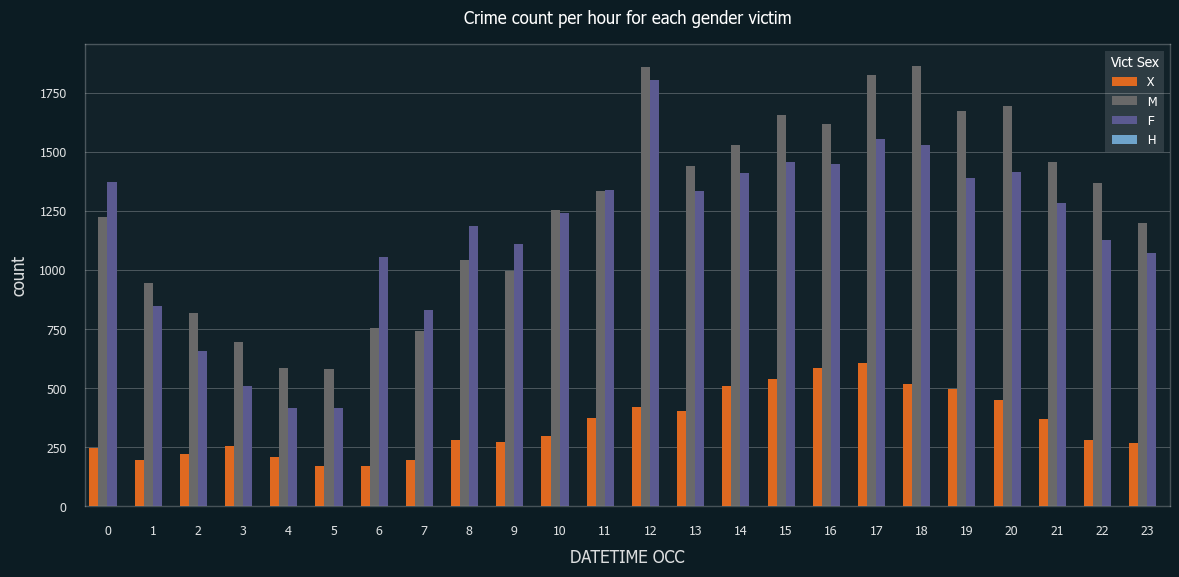

In [172]:
# Crime count per hour, showing victim gender
plt.figure(figsize=(14,6))
sns.countplot(data=df, x=df['DATETIME OCC'].dt.hour, hue=df['Vict Sex']).set_title('Crime count per hour for each gender victim')
plt.show()

## Reshaping data to fit into line plot

In [345]:
df['HOUR OCC'] = df['DATETIME OCC'].dt.hour

In [349]:
df_crime_count_gender = df.groupby(['HOUR OCC', 'Vict Sex'])['DR_NO'].count()

In [354]:
df_crime_count_gender = df_crime_count_gender.reset_index()

In [355]:
df_crime_count_gender

,HOUR OCC,Vict Sex,DR_NO
0,0,F,12578
1,0,H,8
2,0,M,12073
3,0,X,2437
4,1,F,8179
...,...,...,...
88,22,X,2437
89,23,F,10615
90,23,H,6
91,23,M,12333


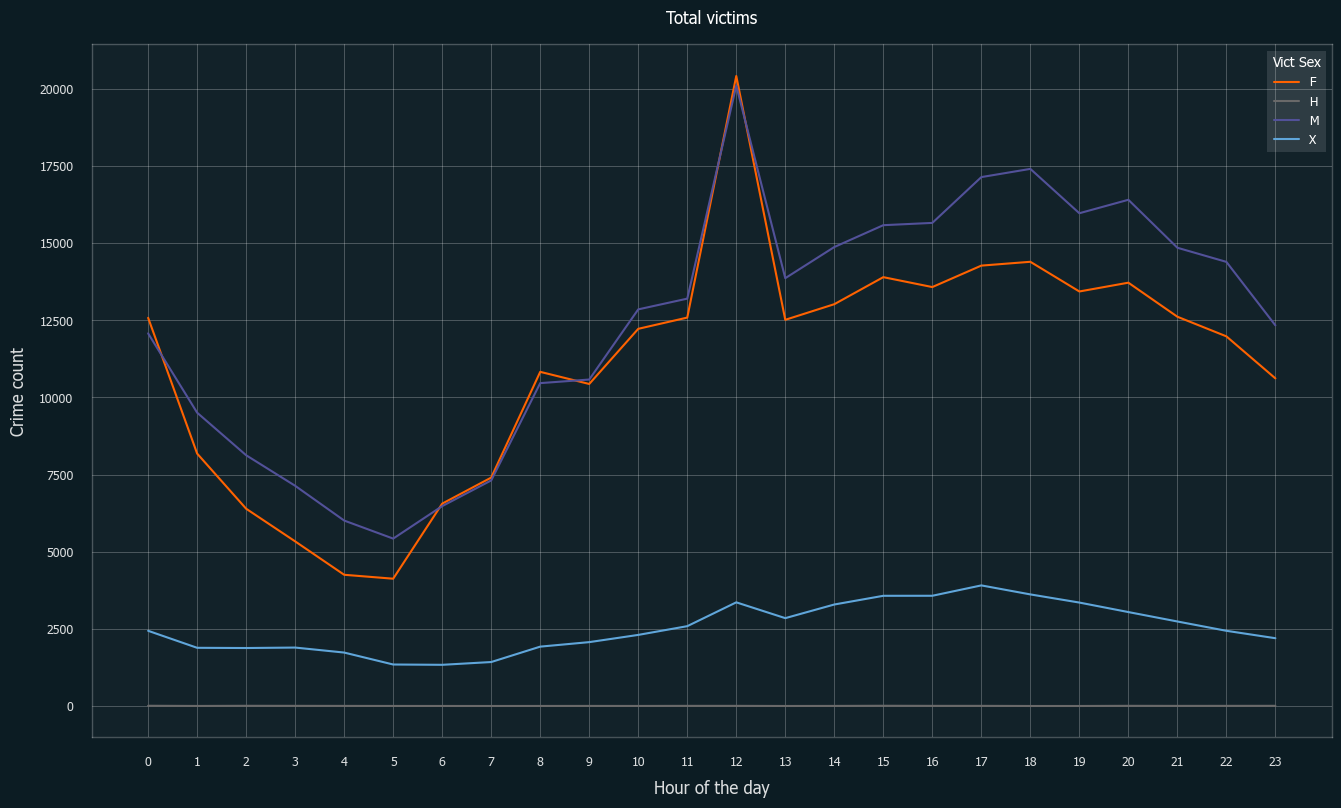

In [372]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df_crime_count_gender, x=df_crime_count_gender['HOUR OCC'], y=df_crime_count_gender['DR_NO'], hue=df_crime_count_gender['Vict Sex'])
plt.title('Total victims')
plt.ylabel('Crime count')
plt.xlabel('Hour of the day')
plt.xticks(np.arange(0, 24, step=1))
plt.show()

## Hour of the day, type of crime

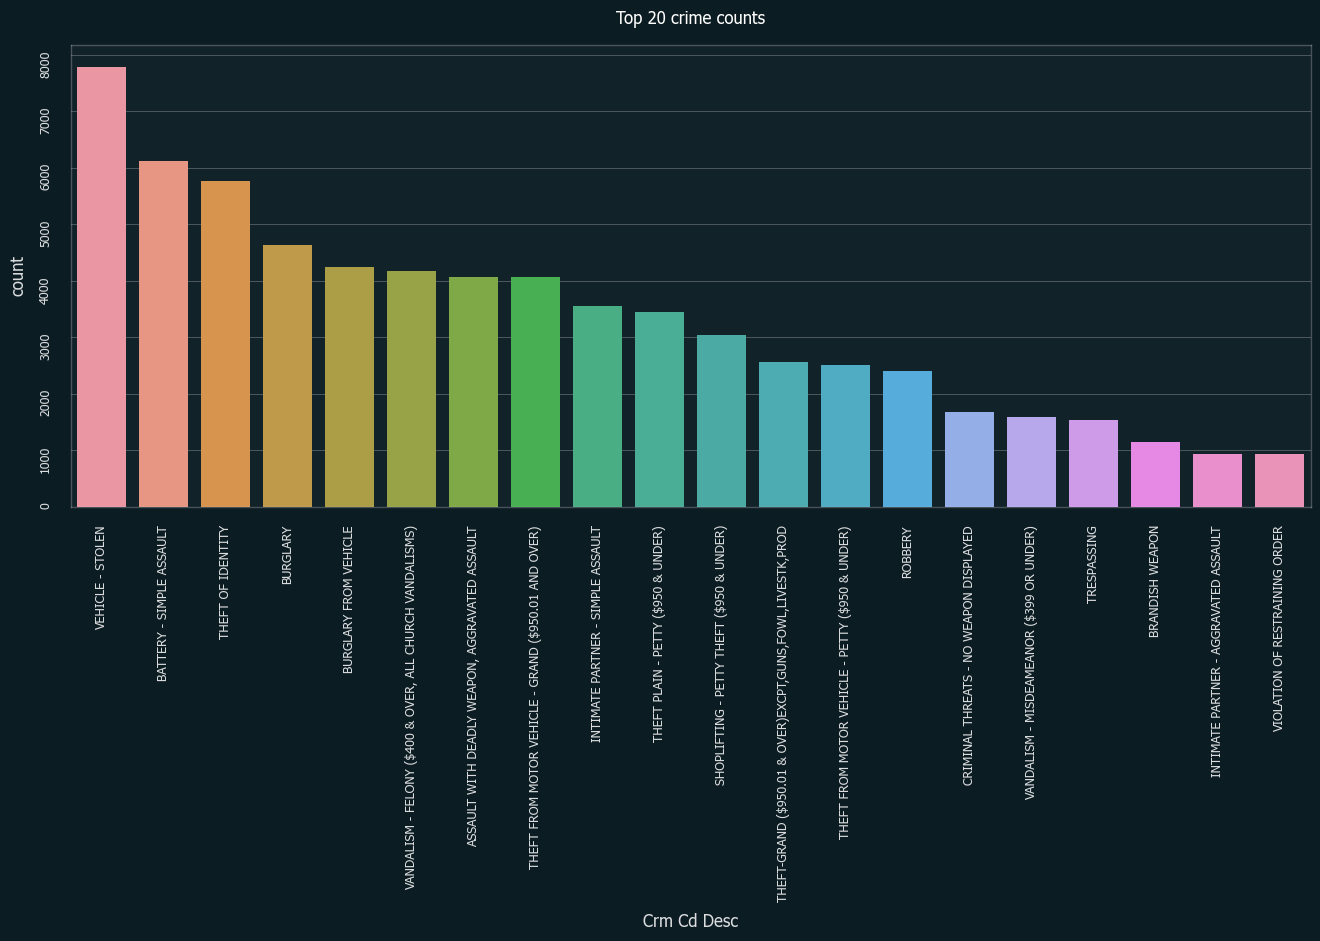

In [173]:
# Top 20 crimes
plt.figure(figsize=(16,6))
sns.countplot(data=df, x=df['Crm Cd Desc'], order=df['Crm Cd Desc'].value_counts().iloc[:20].index)\
    .tick_params(labelrotation=90)
plt.title('Top 20 crime counts')

plt.show()

In [174]:
# Filter out serious crimes
df_srs = df.loc[df['Crm Cd Desc'].str.contains('HOMICIDE|RAPE|KIDNAP|ROBBERY|BURGLARY')]

In [175]:
# Filter out the most serious crimes
df_srs = df_srs.loc[df_srs['Crm Cd Desc'].isin(['BURGLARY',
                                      'ROBBERY',
                                      'CRIMINAL HOMICIDE',
                                      'KIDNAPPING',
                                      'RAPE, FORCIBLE']
                                      )]

In [176]:
# Add hour occurred column
df_srs['HOUR OCC'] = df_srs['DATETIME OCC'].dt.hour

In [177]:
# Adding day of week column to the dataframe
df_srs['DAY OF WEEK'] = df_srs['DATETIME OCC'].dt.dayofweek

In [178]:
# Dataframe with Crime count, hour occurred for each weekday

df_srs_mon = df_srs.loc[df_srs['DAY OF WEEK'] == 0] # Monday
df_srs_tue = df_srs.loc[df_srs['DAY OF WEEK'] == 1] # Tuesday
df_srs_wed = df_srs.loc[df_srs['DAY OF WEEK'] == 2] # Wednesday
df_srs_thu = df_srs.loc[df_srs['DAY OF WEEK'] == 3] # Thursday
df_srs_fri = df_srs.loc[df_srs['DAY OF WEEK'] == 4] # Friday
df_srs_sat = df_srs.loc[df_srs['DAY OF WEEK'] == 5] # Saturday
df_srs_sun = df_srs.loc[df_srs['DAY OF WEEK'] == 6] # Sunday

In [179]:
df_srs_mon_count = df_srs_mon['HOUR OCC'].value_counts().sort_index().rename('Monday')
df_srs_tue_count = df_srs_tue['HOUR OCC'].value_counts().sort_index().rename('Tuesday')
df_srs_wed_count = df_srs_wed['HOUR OCC'].value_counts().sort_index().rename('Wednesday')
df_srs_thu_count = df_srs_thu['HOUR OCC'].value_counts().sort_index().rename('Thursday')
df_srs_fri_count = df_srs_fri['HOUR OCC'].value_counts().sort_index().rename('Friday')
df_srs_sat_count = df_srs_sat['HOUR OCC'].value_counts().sort_index().rename('Saturday')
df_srs_sun_count = df_srs_sun['HOUR OCC'].value_counts().sort_index().rename('Sunday')

In [180]:
df_crime_count_day_time = pd.concat([df_srs_mon_count, df_srs_tue_count,
                                     df_srs_wed_count, df_srs_thu_count,
                                     df_srs_fri_count, df_srs_sat_count,
                                     df_srs_sun_count], axis=1)

Text(0, 0.5, 'Crimes committed')

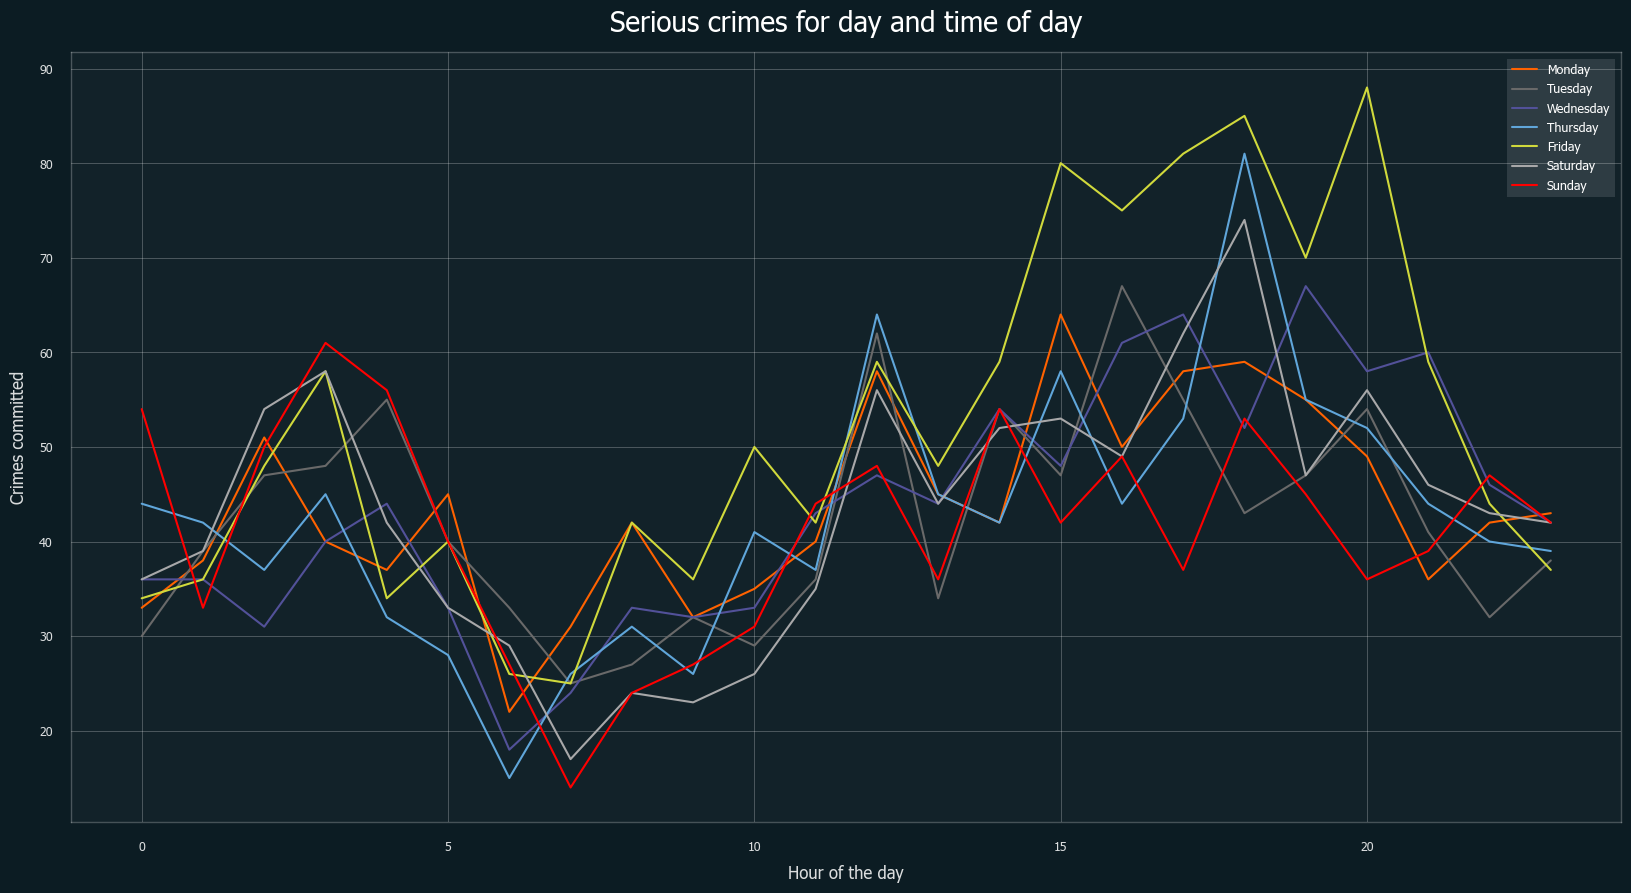

In [373]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_crime_count_day_time, dashes=False)
plt.title('Serious crimes for day and time of day', fontsize=20)
plt.xlabel('Hour of the day')
plt.ylabel('Crimes committed')

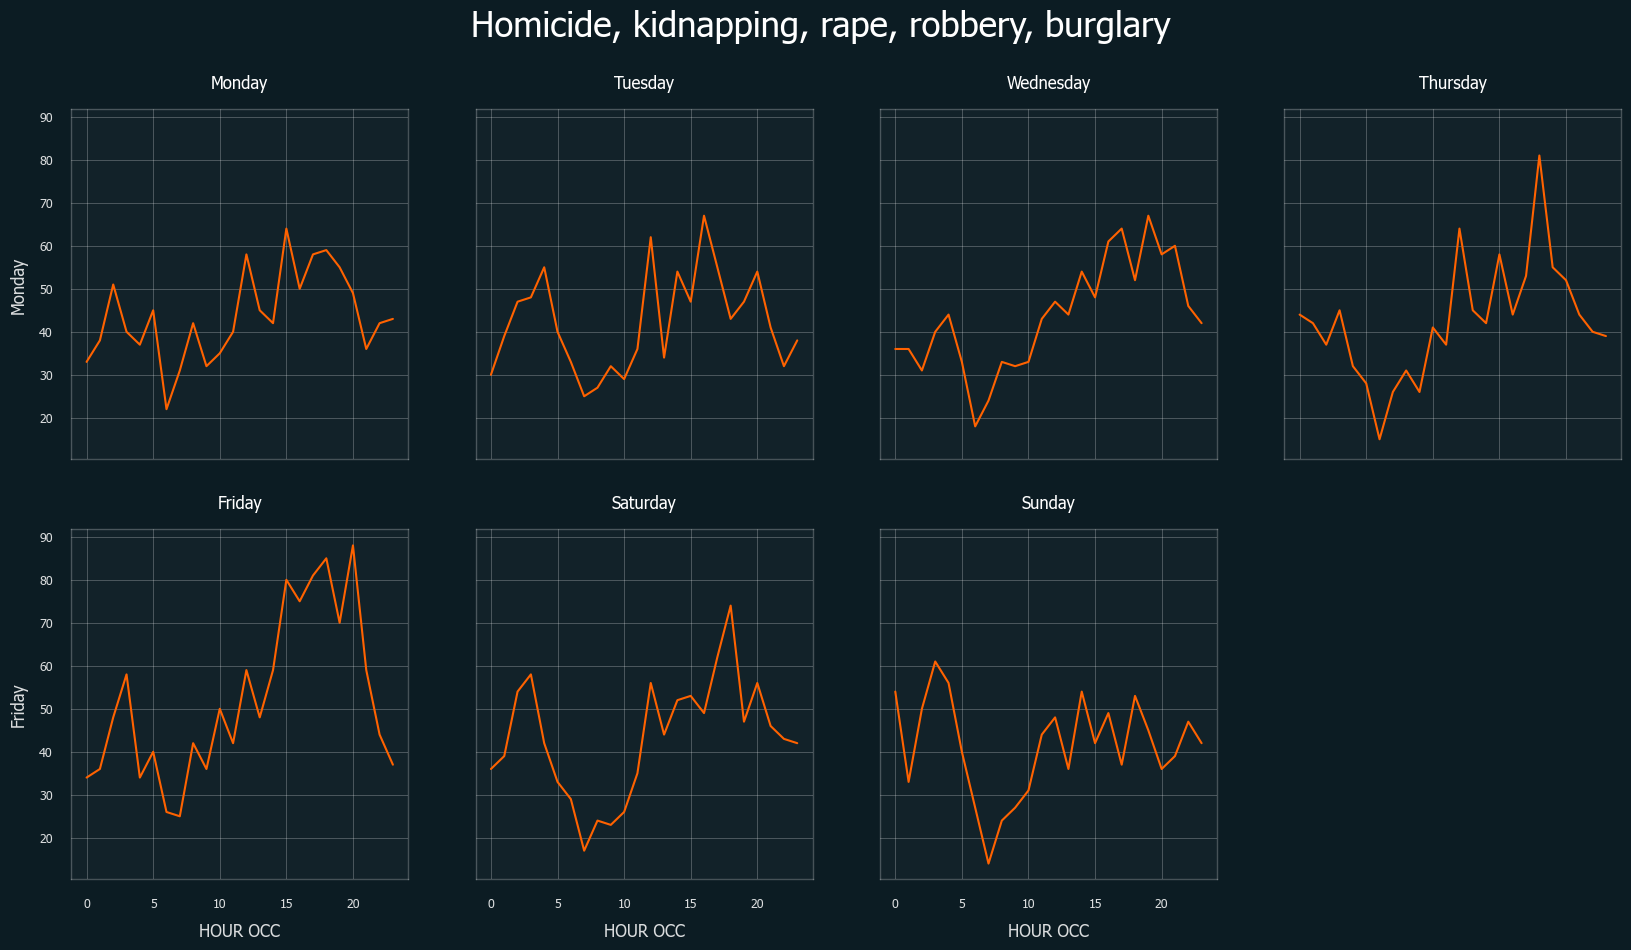

In [182]:
# One plot with 7 lines(weekdays), for count of each serious crime
fig, ax = plt.subplots(2,4, figsize=(20,10), sharey='all', sharex='all')
sns.lineplot(data=df_crime_count_day_time['Monday'], ax=ax[0][0])
sns.lineplot(data=df_crime_count_day_time['Tuesday'], ax=ax[0][1])
sns.lineplot(data=df_crime_count_day_time['Wednesday'], ax=ax[0][2])
sns.lineplot(data=df_crime_count_day_time['Thursday'], ax=ax[0][3])
sns.lineplot(data=df_crime_count_day_time['Friday'], ax=ax[1][0])
sns.lineplot(data=df_crime_count_day_time['Saturday'], ax=ax[1][1])
sns.lineplot(data=df_crime_count_day_time['Sunday'], ax=ax[1][2])

ax[0][0].set_title('Monday')
ax[0][1].set_title('Tuesday')
ax[0][2].set_title('Wednesday')
ax[0][3].set_title('Thursday')
ax[1][0].set_title('Friday')
ax[1][1].set_title('Saturday')
ax[1][2].set_title('Sunday')

# Delete 8th subplot
fig.delaxes(ax[1][3])

fig.suptitle('Homicide, kidnapping, rape, robbery, burglary', fontsize=25)

plt.show()

## Serious crimes over the years trend

In [525]:
df_srs_all = df.loc[df['Crm Cd Desc'].isin(['BURGLARY',
                              'ROBBERY',
                              'CRIMINAL HOMICIDE',
                              'KIDNAPPING',
                              'RAPE, FORCIBLE'])]

In [526]:
df_srs_all['DATETIME OCC'] = df_srs_all['DATETIME OCC'].dt.to_period('M')

/var/folders/dy/x6z2mb456s9dvq77dv75k9xr0000gn/T/ipykernel_33103/1330513525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_srs_all['DATETIME OCC'] = df_srs_all['DATETIME OCC'].dt.to_period('M')


In [527]:
df_srs_all_grouped = df_srs_all.groupby(['Crm Cd Desc', 'DATETIME OCC'])['DR_NO'].count()
df_srs_all_grouped = df_srs_all_grouped.reset_index()

In [528]:
df_srs_pivot_table = pd.pivot_table(data=df_srs_all_grouped, index=df_srs_all_grouped['DATETIME OCC'], columns=df_srs_all_grouped['Crm Cd Desc'])

In [529]:
df_srs_pivot_table = df_srs_pivot_table['DR_NO']

In [530]:
df_srs_pivot_table = df_srs_pivot_table.reset_index()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

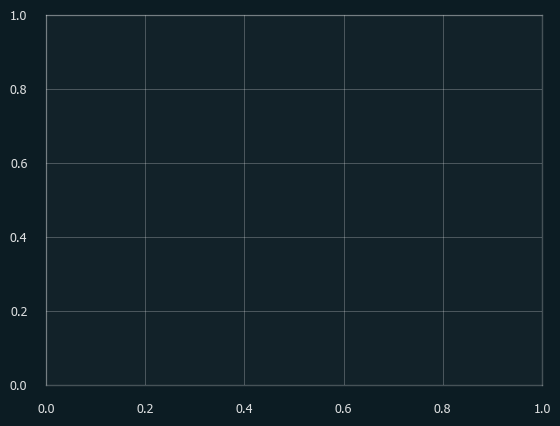

In [535]:
plt.stackplot(df_srs_pivot_table['DATETIME OCC'],
               df_srs_pivot_table['BURGLARY'],
               df_srs_pivot_table['CRIMINAL HOMICIDE'],
               df_srs_pivot_table['KIDNAPPING'],
               df_srs_pivot_table['RAPE, FORCIBLE'],
               df_srs_pivot_table['ROBBERY'])


# Map

In [359]:
df_srs_mon[['HOUR OCC', 'LAT', 'LON']].to_csv('monday.csv')

In [0]:
df_srs_tue[['HOUR OCC', 'LAT', 'LON']].to_csv('tuesday.csv')
df_srs_wed[['HOUR OCC', 'LAT', 'LON']].to_csv('wednesday.csv')
df_srs_thu[['HOUR OCC', 'LAT', 'LON']].to_csv('thursday.csv')
df_srs_fri[['HOUR OCC', 'LAT', 'LON']].to_csv('friday.csv')
df_srs_sat[['HOUR OCC', 'LAT', 'LON']].to_csv('saturday.csv')

In [362]:
df_srs_sun[['HOUR OCC', 'LAT', 'LON']].to_csv('sunday.csv')


In [360]:
df_srs

,DR_NO,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATETIME OCC,HOUR OCC,DAY OF WEEK
224925,231400768,04/17/2023,14,Pacific,1453,1,310,BURGLARY,0344 1402,0,...,998.0,NaN,NaN,4000 GLENCOE AV,NaN,33.9918,-118.4446,2023-04-17 03:00:00,3,0
410000,230104641,01/10/2023,1,Central,101,1,310,BURGLARY,0329 1601 1822 1213,0,...,NaN,NaN,NaN,1700 STADIUM WY,NaN,34.0689,-118.2431,2023-01-09 12:00:00,12,0
413551,231705850,02/18/2023,17,Devonshire,1745,1,310,BURGLARY,0344 1608,0,...,NaN,NaN,NaN,18000 CHATSWORTH ST,NaN,34.2645,-118.5264,2023-02-17 17:00:00,17,4
413716,230306645,02/20/2023,3,Southwest,331,1,210,ROBBERY,0352 0344 0355 1822,25,...,NaN,NaN,NaN,4700 W JEFFERSON BL,NaN,34.0255,-118.3471,2023-02-19 23:15:00,23,6
414991,230605910,02/14/2023,6,Hollywood,642,1,310,BURGLARY,1822 0344 1501,24,...,NaN,NaN,NaN,1300 N ORANGE GROVE AV,NaN,34.0944,-118.3604,2023-02-07 07:00:00,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717643,231207909,03/06/2023,12,77th Street,1208,1,210,ROBBERY,0913 0344 0334 0355 0302,53,...,NaN,NaN,NaN,47TH ST,FIGUEROA ST,34.0007,-118.2827,2023-03-06 00:05:00,0,0
717653,231404759,01/20/2023,14,Pacific,1483,1,310,BURGLARY,0314,22,...,NaN,NaN,NaN,7300 W MANCHESTER AV,NaN,33.9597,-118.4250,2023-01-20 20:15:00,20,4
717657,230505717,02/16/2023,5,Harbor,557,1,210,ROBBERY,1822 0416 0305 0344,78,...,NaN,NaN,NaN,100 S GAFFEY ST,NaN,33.7433,-118.2923,2023-02-12 19:00:00,19,6
717667,232008464,04/18/2023,20,Olympic,2019,1,210,ROBBERY,0416 0344 0342 1000 0429 0420 1822 0354,22,...,NaN,NaN,NaN,200 S WESTMORELAND AV,NaN,34.0704,-118.2877,2023-04-18 16:45:00,16,1


In [317]:
df_srs_mon['HOUR OCC']

224925     3
410000    12
425558     8
496237    19
507240    15
          ..
717560    20
717572    14
717573    20
717605    15
717643     0
Name: HOUR OCC, Length: 1047, dtype: int32

In [57]:
from keplergl import KeplerGl
import geopandas as gpd

In [318]:
gdf_mon = gpd.GeoDataFrame(df_srs_mon['HOUR OCC'], geometry=gpd.points_from_xy(df_srs_mon.LON, df_srs_mon.LAT))

In [319]:
mon = KeplerGl()
mon.add_data(data=gdf_mon, name='Crime Mondays')
mon

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Crime Mondays': {'index': [224925, 410000, 425558, 496237, 507240, 512583, 560855, 568985, 571…

In [60]:
gdf_tue = gpd.GeoDataFrame(df_srs_mon, geometry=gpd.points_from_xy(df_srs_mon.LON, df_srs_mon.LAT))
mon = KeplerGl()
mon.add_data(data=gdf_mon, name='Crime Mondays')
mon

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'Crime Mondays': {'index': [224925, 410000, 425558, 496237, 507240, 512583, 560855, 568985, 571…

In [61]:
gdf_mon = gpd.GeoDataFrame(df_srs_mon, geometry=gpd.points_from_xy(df_srs_mon.LON, df_srs_mon.LAT))
mon = KeplerGl()
mon.add_data(data=gdf_mon, name='Crime Mondays')
mon

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'Crime Mondays': {'index': [224925, 410000, 425558, 496237, 507240, 512583, 560855, 568985, 571…